#### Importing packages

In [517]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

### tmdb_movie CSV file

In [518]:
tmdb_movie = pd.read_csv("df_directors_dates_V5.csv")
tmdb_movie.head()

,Unnamed: 0,original_title,genres,averagerating,numvotes,main_genre,subgenre_1,subgenre_2,primary_name,primary_profession,id,movie,production_budget,domestic_gross,worldwide_gross,profit,roi,release_date
0,1,The Overnight,"Comedy,Mystery",6.1,14828,Comedy,Mystery,NaN,Patrick Brice,"director,writer,actor",21,The Overnight,200000.0,1109808.0,1.165996e+06,965996,582.998000,2015-06-19
1,2,Jurassic World,"Action,Adventure,Sci-Fi",7.0,539338,Action,Adventure,Sci-Fi,Colin Trevorrow,"writer,producer,director",34,Jurassic World,215000000.0,652270625.0,1.648855e+09,1433854864,766.909239,2015-06-12
2,3,Spy,"Action,Crime,Drama",6.6,78,Action,Crime,Drama,Alexander Klymko,"producer,camera_department,sound_department",83,Spy,65000000.0,110825712.0,2.325857e+08,167585748,357.824228,2011-08-09
3,5,Spy,"Action,Comedy,Crime",7.0,213908,Action,Comedy,Crime,Paul Feig,"actor,producer,director",83,Spy,65000000.0,110825712.0,2.325857e+08,167585748,357.824228,2011-08-09
4,7,The Rum Diary,"Comedy,Drama",6.2,94787,Comedy,Drama,NaN,Bruce Robinson,"actor,writer,director",16,The Rum Diary,45000000.0,13109815.0,2.154473e+07,-23455268,47.877182,2011-10-27


In [519]:
tmdb_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1621 entries, 0 to 1620
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1621 non-null   int64  
 1   original_title      1621 non-null   object 
 2   genres              1621 non-null   object 
 3   averagerating       1621 non-null   float64
 4   numvotes            1621 non-null   int64  
 5   main_genre          1621 non-null   object 
 6   subgenre_1          1274 non-null   object 
 7   subgenre_2          877 non-null    object 
 8   primary_name        1619 non-null   object 
 9   primary_profession  1619 non-null   object 
 10  id                  1621 non-null   int64  
 11  movie               1621 non-null   object 
 12  production_budget   1621 non-null   float64
 13  domestic_gross      1621 non-null   float64
 14  worldwide_gross     1621 non-null   float64
 15  profit              1621 non-null   int64  
 16  roi   

#### Getting the top 10 most popular genres in number of movies released

In [520]:
# First, creating a dictionary with genres and counts
top_10_genres_index = list(tmdb_movie['main_genre'].value_counts()[:10].keys())
top_10_genre_counts = tmdb_movie['main_genre'].value_counts()[:10]
top_10_genres = dict(zip(top_10_genres_index, top_10_genre_counts))

In [521]:
top_10_genres

{'Drama': 388,
 'Action': 355,
 'Comedy': 309,
 'Horror': 125,
 'Adventure': 110,
 'Biography': 100,
 'Crime': 94,
 'Documentary': 79,
 'Thriller': 26,
 'Animation': 10}

##### Number of movies in top 10 genres

Text(0, 0.5, 'Number of Movies')

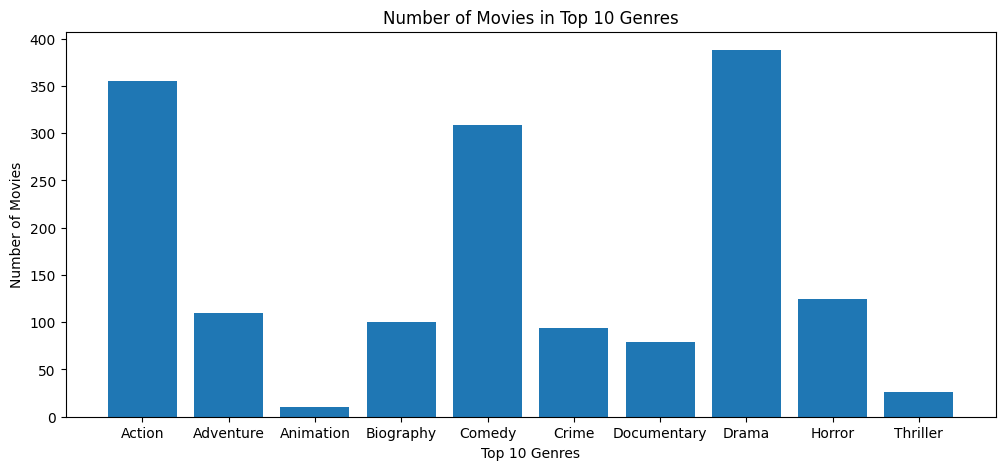

In [522]:
# Visualizing the number of movies in top 10 movie genres

# Sorting them alphabetically for the visualization
top_10_genres_index.sort()
top_10_genres_sorted = {i: top_10_genres[i] for i in top_10_genres_index}

# Visualizing in a bar graph
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(top_10_genres_sorted.keys(), top_10_genres_sorted.values())
ax.set_title("Number of Movies in Top 10 Genres")
ax.set_xlabel("Top 10 Genres")
ax.set_ylabel("Number of Movies")

### Linear Regression

#### Cleaning data before modeling

In [523]:
# Removing null values before running linear regression
tmdb_movie['production_budget'].isna().sum()

tmdb_movie.dropna(subset='production_budget', inplace=True)
tmdb_movie['profit'].isna().sum()

0

In [524]:
# Changing values so that they are in millions for visualization
columns = ['production_budget', 'profit']

tmdb_movie[columns] = tmdb_movie[columns].apply(lambda x: x/1000000)
tmdb_movie[columns]

,production_budget,profit
0,0.2,0.965996
1,215.0,1433.854864
2,65.0,167.585748
3,65.0,167.585748
4,45.0,-23.455268
...,...,...
1616,8.0,-7.299739
1617,48.0,71.736188
1618,13.0,-3.366889
1619,10.0,60.133905


#### Simple linear regression model between production budget and profit

In [525]:
tmdb_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1621 entries, 0 to 1620
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1621 non-null   int64  
 1   original_title      1621 non-null   object 
 2   genres              1621 non-null   object 
 3   averagerating       1621 non-null   float64
 4   numvotes            1621 non-null   int64  
 5   main_genre          1621 non-null   object 
 6   subgenre_1          1274 non-null   object 
 7   subgenre_2          877 non-null    object 
 8   primary_name        1619 non-null   object 
 9   primary_profession  1619 non-null   object 
 10  id                  1621 non-null   int64  
 11  movie               1621 non-null   object 
 12  production_budget   1621 non-null   float64
 13  domestic_gross      1621 non-null   float64
 14  worldwide_gross     1621 non-null   float64
 15  profit              1621 non-null   float64
 16  roi   

In [527]:
# Getting a separate dataframe with top ten genres
ten_genres_df = tmdb_movie.loc[tmdb_movie['main_genre'].isin(top_10_genres_index)]
ten_genres_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1596 entries, 0 to 1620
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1596 non-null   int64  
 1   original_title      1596 non-null   object 
 2   genres              1596 non-null   object 
 3   averagerating       1596 non-null   float64
 4   numvotes            1596 non-null   int64  
 5   main_genre          1596 non-null   object 
 6   subgenre_1          1260 non-null   object 
 7   subgenre_2          868 non-null    object 
 8   primary_name        1596 non-null   object 
 9   primary_profession  1596 non-null   object 
 10  id                  1596 non-null   int64  
 11  movie               1596 non-null   object 
 12  production_budget   1596 non-null   float64
 13  domestic_gross      1596 non-null   float64
 14  worldwide_gross     1596 non-null   float64
 15  profit              1596 non-null   float64
 16  roi        

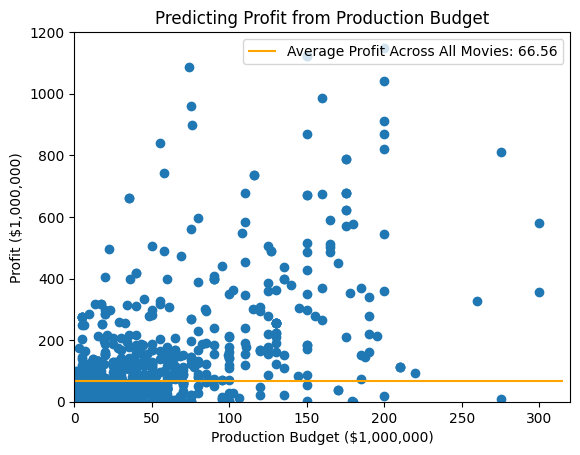

In [533]:
# Baseline model is the overall average profit across all movies 
X = ten_genres_df['production_budget'].values
y = ten_genres_df['profit'].values

plt.scatter(X, y)

xmin, xmax = plt.xlim()
plt.hlines(y=y.mean(),
            xmin=xmin, xmax=xmax,
            label=f"Average Profit Across All Movies: {y.mean():.2f}",
            colors='orange')
plt.xlim([0,320])
plt.ylim([0,1200])
plt.title('Predicting Profit from Production Budget')
plt.xlabel('Production Budget ($1,000,000)')
plt.ylabel('Profit ($1,000,000)')
plt.legend()

In [534]:
lr = LinearRegression()

In [535]:
lr.fit(ten_genres_df[['production_budget']], y)

LinearRegression()

In [536]:
# Getting our linear regression model
m = lr.coef_
b = lr.intercept_
lm_model = m*ten_genres_df['production_budget'].values + b

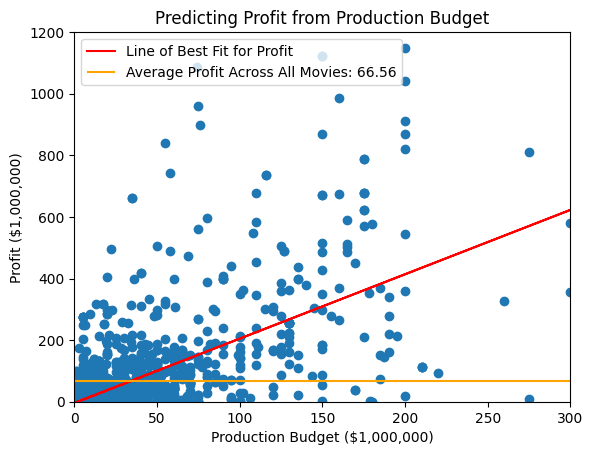

In [537]:
# Creating a scatter plot with the baseline model and the linear regression model
plt.scatter(X, y)
plt.plot(ten_genres_df['production_budget'].values, 
        lm_model, 
        label = 'Line of Best Fit for Profit',
        color='red')

xmin, xmax = plt.xlim()
plt.hlines(y=y.mean(),
            xmin=xmin, xmax=xmax,
            label=f"Average Profit Across All Movies: {y.mean():.2f}",
            colors='orange')

plt.xlim([0,300])
plt.ylim([0,1200])
plt.title('Predicting Profit from Production Budget')
plt.xlabel('Production Budget ($1,000,000)')
plt.ylabel('Profit ($1,000,000)')
plt.legend()
# same as this
# sns.lmplot(x='production_budget', y='worldwide_gross', data=tn_movie_budgets)

In [538]:
# Production budget prediction to result in average profit
pred_budget = (y.mean() - b)/m
pred_budget[0]

33.81113053759399

In [539]:
# Calculating metrics to evaluate the model
r2_score(y, lm_model)

0.37226899390962975

In [540]:
mean_squared_error(y, lm_model)

14768.873485380951

In [541]:
# Comparing with our baseline model,
# Which is the overall average profit
base_model = 0*ten_genres_df['production_budget'].values + y.mean()
r2_score(y, base_model)

0.0

In [542]:
mean_squared_error(y, base_model)

23527.392055021057

#### (Probably not for the final notebook) Group wise linear regression model per genre

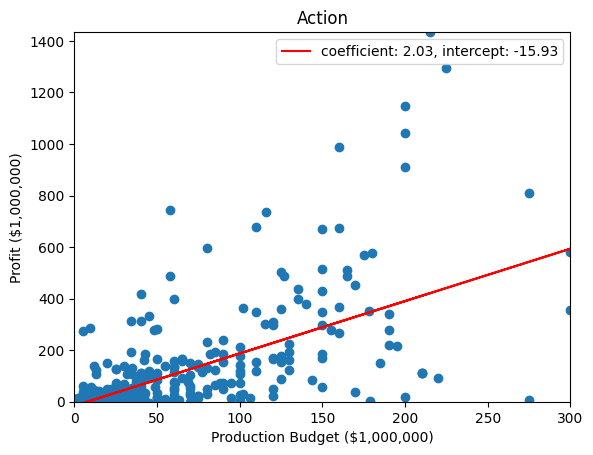

R squared for Action is 0.36100911628716525


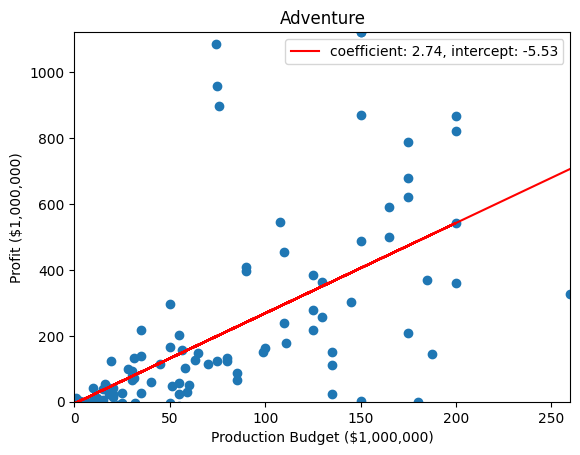

R squared for Adventure is 0.3748121223402896


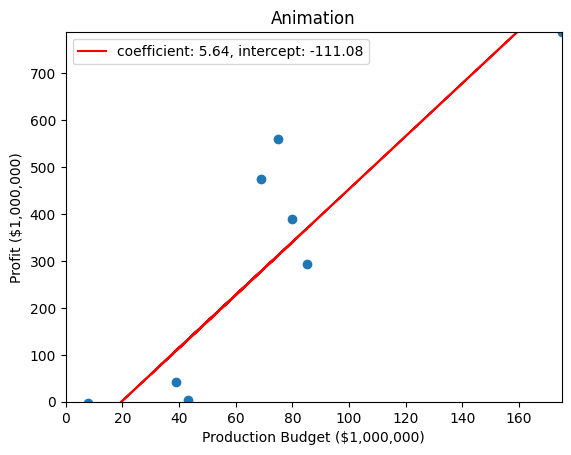

R squared for Animation is 0.7939588333098003


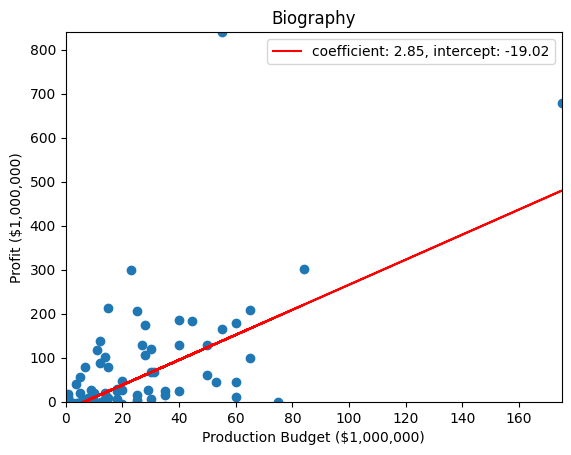

R squared for Biography is 0.30793195706362686


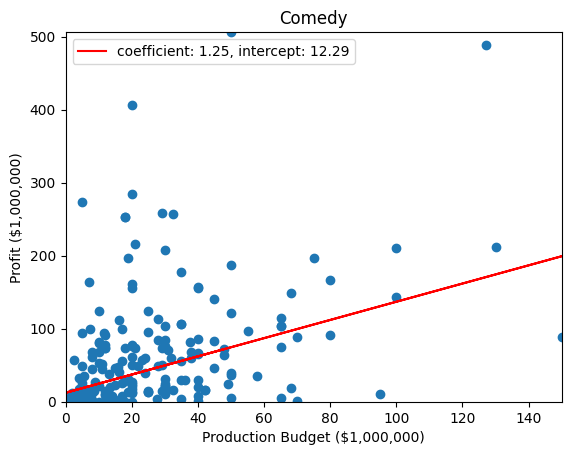

R squared for Comedy is 0.15630839822574438


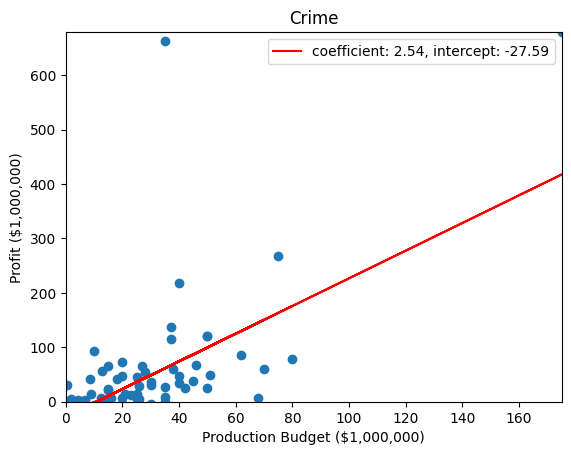

R squared for Crime is 0.3508639678002502


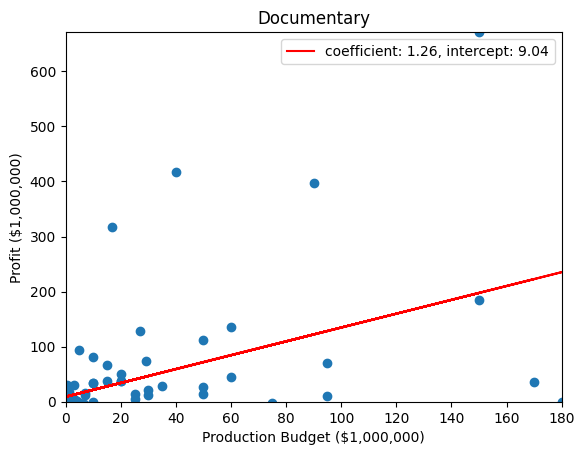

R squared for Documentary is 0.21412691398231987


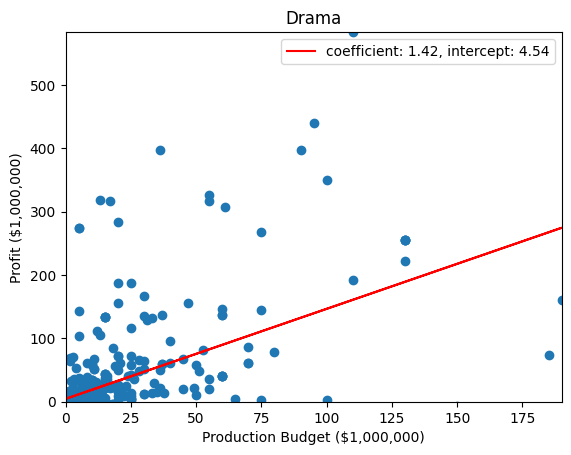

R squared for Drama is 0.24949899886429594


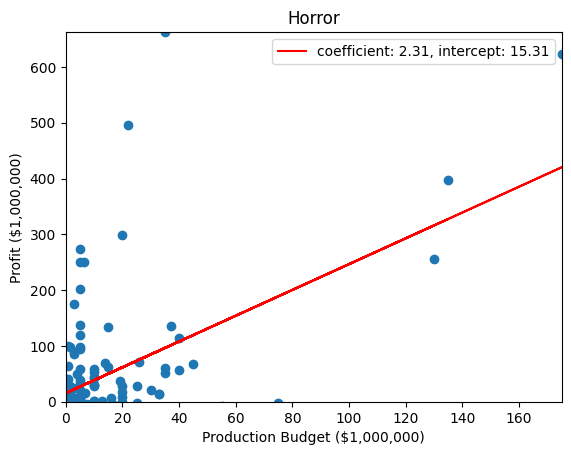

R squared for Horror is 0.2669584217876053


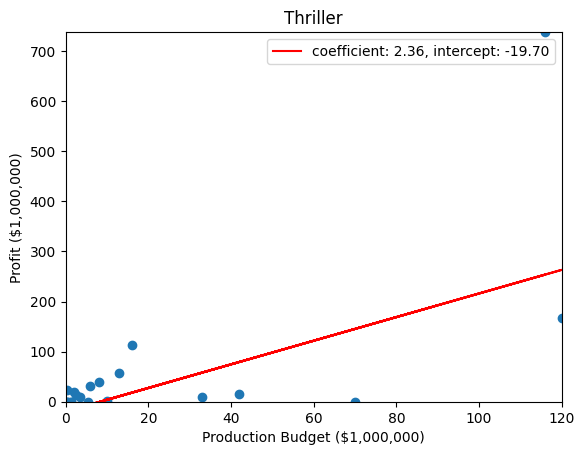

R squared for Thriller is 0.30805562096009576


""


In [543]:
# Group wise linear regression and plot them individually
# Focusing on top 7 genres only
grouped_tmdb_movie = ten_genres_df.groupby(['main_genre'])

def model(df):
    y = df[['profit']].values
    X = df[['production_budget']].values
    lr = LinearRegression()
    lr.fit(X, y)
    m = lr.coef_
    b = lr.intercept_
    y_model = m*X + b
    plt.scatter(X,y)
    plt.plot(X, y_model, color='red', label=f"coefficient: {m[0][0]:.2f}, intercept: {b[0]:.2f}")
    plt.title(f"{df['main_genre'].values[0]}")
    plt.xlim([0,X.max()])
    plt.ylim([0,y.max()])
    plt.xlabel("Production Budget ($1,000,000)")
    plt.ylabel("Profit ($1,000,000)")
    plt.legend()
    plt.show()
    print(f"R squared for {df['main_genre'].values[0]} is {r2_score(y, y_model)}")

grouped_tmdb_movie.apply(model)

#### ANOVA for genre and profit

In [544]:
genre_groups = {}
for genre in top_10_genres_index:
    genre_groups[genre] = ten_genres_df.loc[ten_genres_df['main_genre'] == genre]['profit'].values

result = stats.f_oneway(*genre_groups.values())
f_stat, p_value = result
result

F_onewayResult(statistic=19.103575673086077, pvalue=1.330198233847552e-30)

In [545]:
tukey = pairwise_tukeyhsd(endog=ten_genres_df['profit'], groups=ten_genres_df['main_genre'], alpha=0.05)
print(tukey)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1      group2    meandiff p-adj    lower     upper   reject
-------------------------------------------------------------------
     Action   Adventure   84.9601    0.0    34.432  135.4883   True
     Action   Animation  140.4716 0.0818   -8.0022  288.9454  False
     Action   Biography  -55.7125 0.0268  -108.134   -3.2911   True
     Action      Comedy  -71.1581    0.0 -107.1835  -35.1328   True
     Action       Crime  -73.1121 0.0007  -126.823  -19.4012   True
     Action Documentary  -69.0772 0.0058 -126.6788  -11.4755   True
     Action       Drama  -76.1831    0.0 -110.1912   -42.175   True
     Action      Horror  -59.5224 0.0037 -107.6805  -11.3644   True
     Action    Thriller  -68.7245   0.38 -162.8006   25.3515  False
  Adventure   Animation   55.5115 0.9793  -97.4253  208.4482  False
  Adventure   Biography -140.6727    0.0 -204.6507  -76.6946   True
  Adventure      Comedy -156.1182    0.0 -207.52

Text(0, 0.5, 'Mean Profit ($ 1,000,000)')

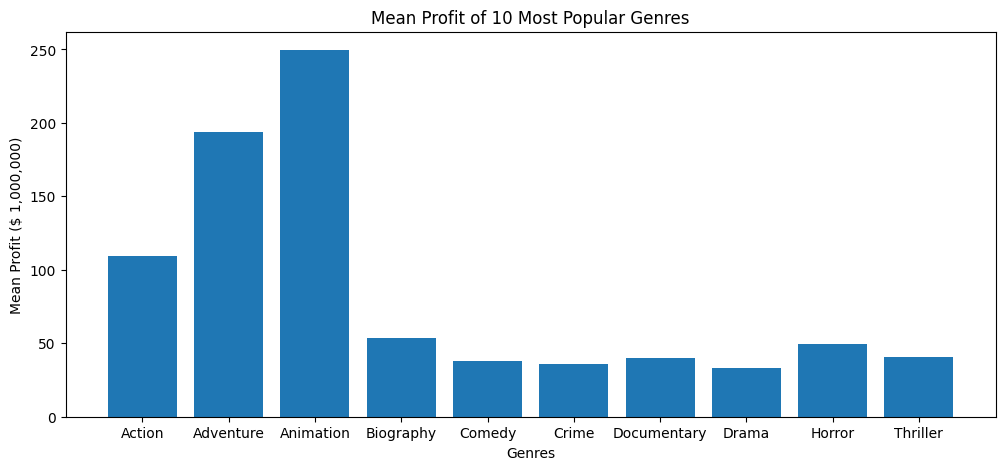

In [546]:
# Visualizing mean profit per genre
genre_avg = {}
for genre in top_10_genres_index:
    genre_avg[genre] = genre_groups[genre].mean()

fig, ax = plt.subplots(figsize=(12,5))
values = list(genre_avg.values())
keys = list(genre_avg.keys())
ax.bar(keys, values)
ax.set_title('Mean Profit of 10 Most Popular Genres')
ax.set_xlabel('Genres')
ax.set_ylabel('Mean Profit ($ 1,000,000)')



### Release date and profit based on genre

In [547]:
# Extracting the release month
ten_genres_df['release_month'] = ten_genres_df['release_date'].str[5:7].astype(int)
ten_genres_df['release_month'].value_counts()

/var/folders/g7/g9fxssr51yd508bw8xr5xtcw0000gn/T/ipykernel_7087/3712157855.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ten_genres_df['release_month'] = ten_genres_df['release_date'].str[5:7].astype(int)


release_month
10    203
9     159
4     146
3     145
12    145
11    131
8     119
1     118
6     115
2     110
5     106
7      99
Name: count, dtype: int64

Text(0, 0.5, 'Profit ($ 1,000,000)')

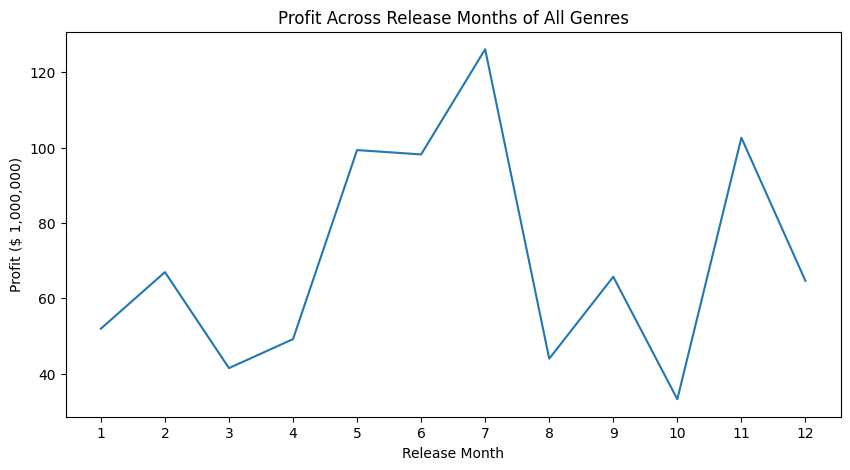

In [548]:
# Visualizing changing in profits across months
fig, ax = plt.subplots(figsize=(10,5))
x_profit = ten_genres_df['release_month'].value_counts().sort_index().index
y_profit = ten_genres_df.groupby('release_month')['profit'].mean()
ax.plot(x_profit, y_profit)
ax.set_xticks(range(1,13))
ax.set_title('Profit Across Release Months of All Genres')
ax.set_xlabel('Release Month')
ax.set_ylabel('Profit ($ 1,000,000)')

#### Separating profits across months per genre

In [549]:
grouped_genre_month = ten_genres_df.groupby('main_genre')

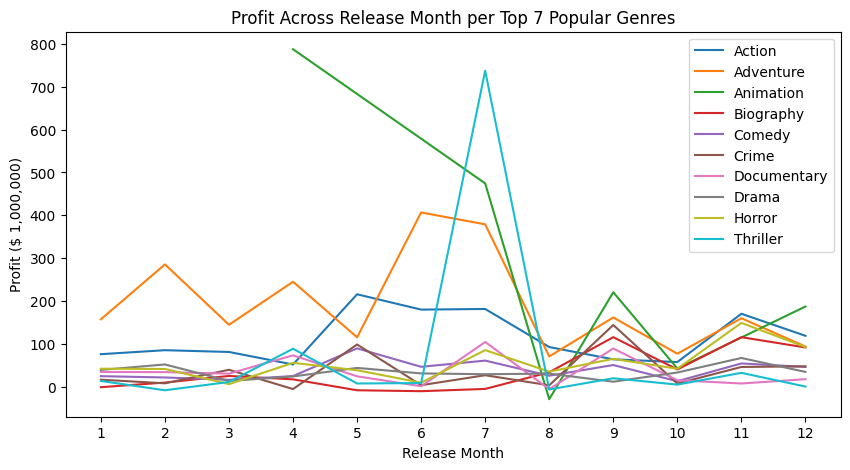

In [550]:
fig, ax = plt.subplots(figsize=(10,5))

for genre in top_10_genres_index:
        x_month = grouped_genre_month.get_group(genre)['release_month'].value_counts().sort_index().index
        y_month = grouped_genre_month.get_group(genre).groupby('release_month')['profit'].mean()
        ax.plot(x_month, y_month, label=f"{genre}")
ax.set_xticks(range(1,13))
ax.set_title('Profit Across Release Month per Top 7 Popular Genres')
ax.set_xlabel('Release Month')
ax.set_ylabel('Profit ($ 1,000,000)')
ax.legend()
